In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Cauchy problem:

In [68]:
f = lambda t, x: -x
a = 0
b = 3
N = 1000
t = np.linspace(a, b, N)
x_exact = np.vectorize(lambda t: np.exp(-t))(t)

In [69]:
u = np.zeros_like(t)
u[0] = 1

# Метод Эйлера

In [70]:
def euler(t,u,f):
    for i in range(len(t)-1):
        h = t[i+1] - t[i]
        u[i+1] = u[i] + h*(f(t[i], u[i]))
    return u

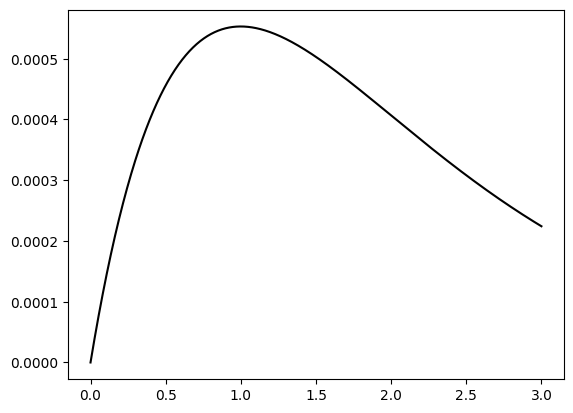

In [71]:
plt.plot(t, np.abs(euler(t,u,f) - x_exact),'k')

# Метод Рунге-Кутты 2-ого порядка

In [72]:
def runge_kutt_2(t,u,f, alpha=0.75):
    for i in range(len(t)-1):
        h = t[i+1] - t[i]
        u[i+1] = u[i] + h*((1-alpha)*f(t[i], u[i])+ alpha*f(t[i] + h/(2*alpha), u[i] + h/(2*alpha)*f(t[i], u[i])))
    return u

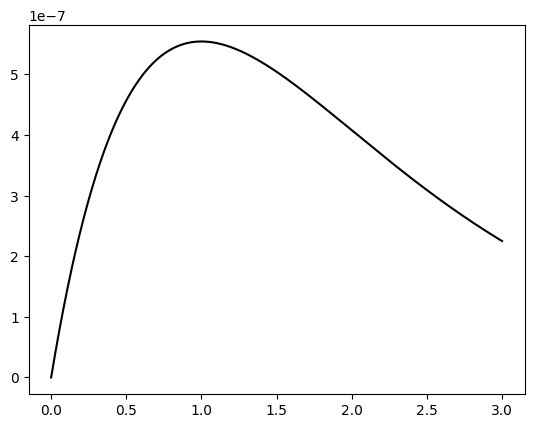

In [73]:
u = np.zeros_like(t)
u[0] = 1
plt.plot(t, np.abs(runge_kutt_2(t,u,f) - x_exact),'k')

# Метод Рунге-Кутты 4-ого порядка

In [74]:
def runge_kutt_4(t,u,f, alpha=0.75):
    for i in range(len(t)-1):
        h = t[i+1] - t[i]
        k1 = f(t[i], u[i])
        k2 = f(t[i] + h/2, u[i] + k1*h/2)
        k3 = f(t[i] + h/2, u[i] + k2*h/2)
        k4 = f(t[i] + h, u[i] + k3*h)
        u[i+1] = u[i] + h/6*(k1+2*k2+2*k3+k4)
    return u

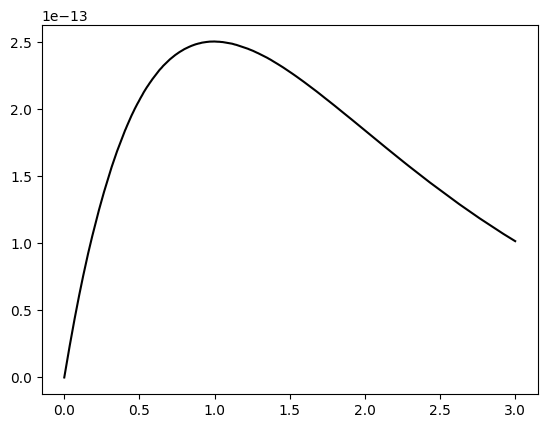

In [75]:
u = np.zeros_like(t)
u[0] = 1
plt.plot(t, np.abs(runge_kutt_4(t,u,f) - x_exact),'k')